#### Libraries

In [44]:
import pandas as pd
import datetime as dt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from utilities.py import *

ModuleNotFoundError: No module named 'utilities.py'; 'utilities' is not a package

#### Search rates

We define search rates by training a logistic regression over some of the features
- Search rate 1 (sr1) = ln(date + age + sex)
- Search rate 2 (sr2) = ln(date + age + sex + {interactions})

In [39]:
def plot_regression_model(model, predictors):
    '''
    Plot weights for each predictor
    Input : model -> regression model (statsmodel)
          : predictors -> name of the predictors for plot (I didn't find how to retrive them from model)
    Output : matplotlib axis
    '''
    x = predictors
    y = model.params 
    ax = sns.barplot(x=x, y=y)
    return ax

In [37]:
df = pd.read_csv('data.csv')

# First we transform the datetime to ordinal values
df.date = pd.to_datetime(df.date)
df.date = df.date.map(dt.datetime.toordinal)

# Make search_conducted be 0 or 1
df.search_conducted =  df.search_conducted.astype(int)

In [38]:
# Logistic regression
sr1 = smf.logit(formula = 'search_conducted ~ date + C(subject_race) + C(subject_sex) + C(Partisanship)', data = df).fit()
sr1.summary()

         Current function value: 0.150392
         Iterations: 35


/opt/anaconda3/envs/ada/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799994
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.01971
Time:                        10:14:38   Log-Likelihood:            -2.7071e+05
converged:                      False   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                     146.5269     14.171     10.340      0.000     118.752     174.301
C(subject_race)[T.hispanic]    -0.1251      0.011    -11.053      0.000      -0.147      -0.103
C(subject_race)[T.white]       -0.6753      0.010    -65.007      0.000      -0.696      -0.655
C(subject_sex)[T.male]          0.5227      0.010     54.891      0.000       0.504       0.541
C(Partisanship)[T.R]           -0.3640      0.008    -44.479      0.000      -0.380      -0.348
date                           -0.0002   1.93e-05    -10.559      0.000      -0.000      -0.000
===============================================================================================
"""

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intercept'),
  Text(1, 0, 'Hispanic(1=hispanic)'),
  Text(2, 0, 'White(1=white)'),
  Text(3, 0, 'Sex(1=male)'),
  Text(4, 0, 'Partisanship(1=R)'),
  Text(5, 0, 'date')])

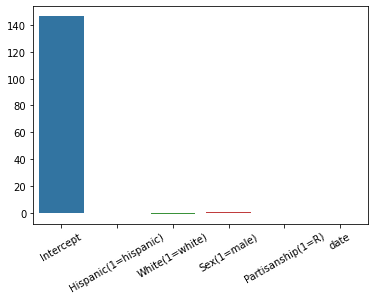

In [43]:
ax = plot_regression_model(sr1, ['Intercept', 'Hispanic(1=hispanic)', 'White(1=white)', 
                              'Sex(1=male)', 'Partisanship(1=R)','date'])
plt.xticks(rotation=30)

In [41]:
sr2 = smf.logit(formula = 'search_conducted ~ date + C(subject_race):C(Partisanship) + C(subject_sex)', data = df).fit()
sr2.summary()

Optimization terminated successfully.
         Current function value: 0.150300
         Iterations 27


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799992
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.02031
Time:                        10:15:34   Log-Likelihood:            -2.7054e+05
converged:                       True   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                        147.4606     14.176     10.402      0.000     119.676     175.245
C(subject_sex)[T.male]                             0.5219      0.010     54.780      0.000       0.503       0.541
C(Partisanship)[T.R]                              -0.6419      0.017    -36.717      0.000      -0.676      -0.608
C(subject_race)[T.hispanic]:C(Partisanship)[D]    -0.2858      0.015    -19.115      0.000      -0.315      -0.256
C(subject_race)[T.white]:C(Partisanship)[D]       -0.8258      0.013    -61.198      0.000      -0.852      -0.799
C(subject_race)[T.hispanic]:C(Partisanship)[R]     0.0821      0.017      4.730      0.000       0.048       0.116
C(subject_race)[T.white]:C(Partisanship)[R]       -0.4745      0.016    -29.166      0.000      -0.506      -0.443
date                                              -0.0002   1.93e-05    -10.613      0.000      -0.000      -0.000
==================================================================================================================
"""

In [42]:
ax = plot_regression_model(sr2, ['Intercept', 'Sex(1=male)','Partisanship(1=R)', 'White(1=white)', 
                              'Sex(1=male)', ,'date'])
ax.set_yscale('log')
plt.xticks(rotation=30)

ValueError: Grouper for 'Intercept' not 1-dimensional